
# Mielage Prediction

Objective : To predict the mielage of Bike's as per given data.

Data Source : This data was taken from https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv

**Import Libraries**

In [77]:
import pandas as pd

In [78]:
import numpy as np


In [79]:
import matplotlib.pyplot as plt


In [80]:
import seaborn as sns

**Import Data**

In [81]:
mielage = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [82]:
mielage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [90]:
mielage.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

In [91]:
mielage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Describe Data**

In [92]:
mielage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [93]:
mielage.corr()

<ipython-input-93-01805358051a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mielage.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [94]:
mielage = mielage.dropna()

In [95]:
mielage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

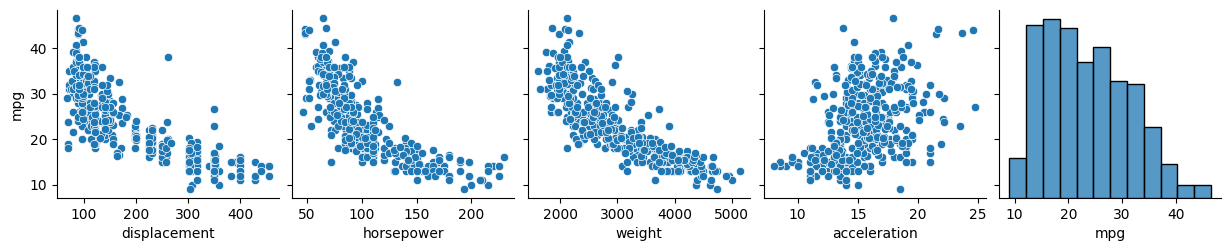

In [96]:
sns.pairplot(mielage, x_vars=['displacement', 'horsepower', 'weight',
       'acceleration','mpg'], y_vars=['mpg'])

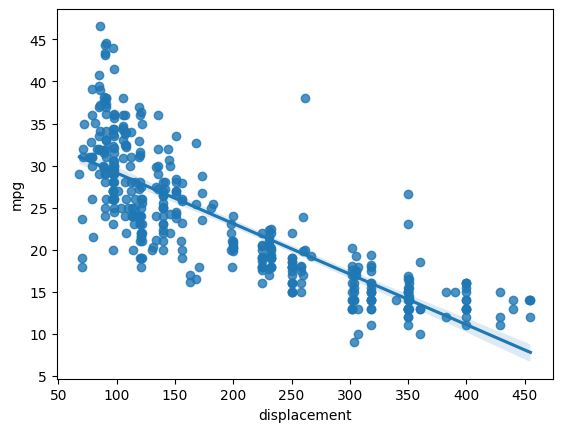

In [97]:
sns.regplot(x= 'displacement', y='mpg', data=mielage);

**Define Target Variable (y) and Feature Variables (X)**

In [98]:
mielage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [99]:
y = mielage['mpg']

In [102]:
y.shape

(392,)

In [103]:
X = mielage[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]

In [104]:
X.shape

(392, 5)

In [105]:
X

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6
394,4,97.0,52.0,2130,24.6
395,4,135.0,84.0,2295,11.6
396,4,120.0,79.0,2625,18.6


In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
ss = StandardScaler()

In [111]:
X = ss.fit_transform(X)

In [112]:
X

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [115]:
pd.DataFrame(X).describe()

,0,1,2,3,4
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.087565e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split**

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 5), (118, 5), (274,), (118,))

**Modeling**

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
lr = LinearRegression()

In [121]:
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
lr.intercept_

23.483119062548774

In [124]:
lr.coef_

array([-0.35497889, -0.72786075, -1.72722268, -4.06315907, -0.11739853])

**Model Evaluation**

In [125]:
y_pred = lr.predict(X_test)

In [126]:
y_pred

array([18.32188513, 15.07674476, 14.2786736 , 23.84523302, 29.74116781,
       23.61299365, 26.6604164 , 24.46783411, 15.04212531, 11.95308088,
       24.25372129, 28.07411938, 31.63490339, 30.93988651, 18.43235175,
       19.44254741, 28.22061918, 32.11171626, 31.11544944, 27.27148308,
       18.65466059, 22.57755904, 26.0601641 , 32.35662813, 20.76368181,
        9.02944902, 21.97420161, 18.04774444, 25.08448615, 15.44280714,
       23.15922382, 16.9712044 ,  9.68627277, 29.96903621, 20.50731645,
       29.14329752, 24.4893792 , 21.74336671, 10.65587765, 13.0945777 ,
       21.50535573, 19.75130296,  6.46747894, 17.61624751, 22.5812909 ,
       29.36165446, 13.43606562, 25.99802937, 29.37071374, 22.40845703,
       22.17384354, 16.45305352, 23.88538244, 30.11931398, 10.26098017,
        9.91322665, 28.20839534, 23.53578327, 20.18010875, 30.67336623,
       20.92795194, 26.88323696, 22.99716612, 14.13762824, 24.69571132,
       27.00688822, 15.25603124, 24.0361934 , 30.75582323, 14.84

In [127]:
from sklearn.metrics import mean_absolute_percentage_error

In [129]:
mean_absolute_percentage_error(y_test,y_pred)

0.14599249597765745